In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d shivamkushwaha/bbc-full-text-document-classification

bbc-full-text-document-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bbc-full-text-document-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import os
file_list = []
for dir,_,file_names in os.walk('/content/bbc'):
  for file_name in file_names:
    file_list.append(os.path.join(dir,file_name))
file_list.sort()
file_list[0]

'/content/bbc/business/001.txt'

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_list))
labels[0]

'business'

In [ ]:
dir = '/content/bbc'
class_list = os.listdir(dir)
#class_list = [folder for folder in class_list if os.path.isdir(os.path.join(dir, folder))]
class_list.remove('.ipynb_checkpoints')
class_list.sort()
class_list

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
filepaths = pd.Series(file_list,name='filepath')
labels = pd.Series(labels, name= 'labels')
data_df = pd.concat([filepaths,labels],axis=1)

In [ ]:
data_df

,filepath,labels
0,/content/bbc/business/001.txt,business
1,/content/bbc/business/002.txt,business
2,/content/bbc/business/003.txt,business
3,/content/bbc/business/004.txt,business
4,/content/bbc/business/005.txt,business
...,...,...
2220,/content/bbc/tech/397.txt,tech
2221,/content/bbc/tech/398.txt,tech
2222,/content/bbc/tech/399.txt,tech
2223,/content/bbc/tech/400.txt,tech


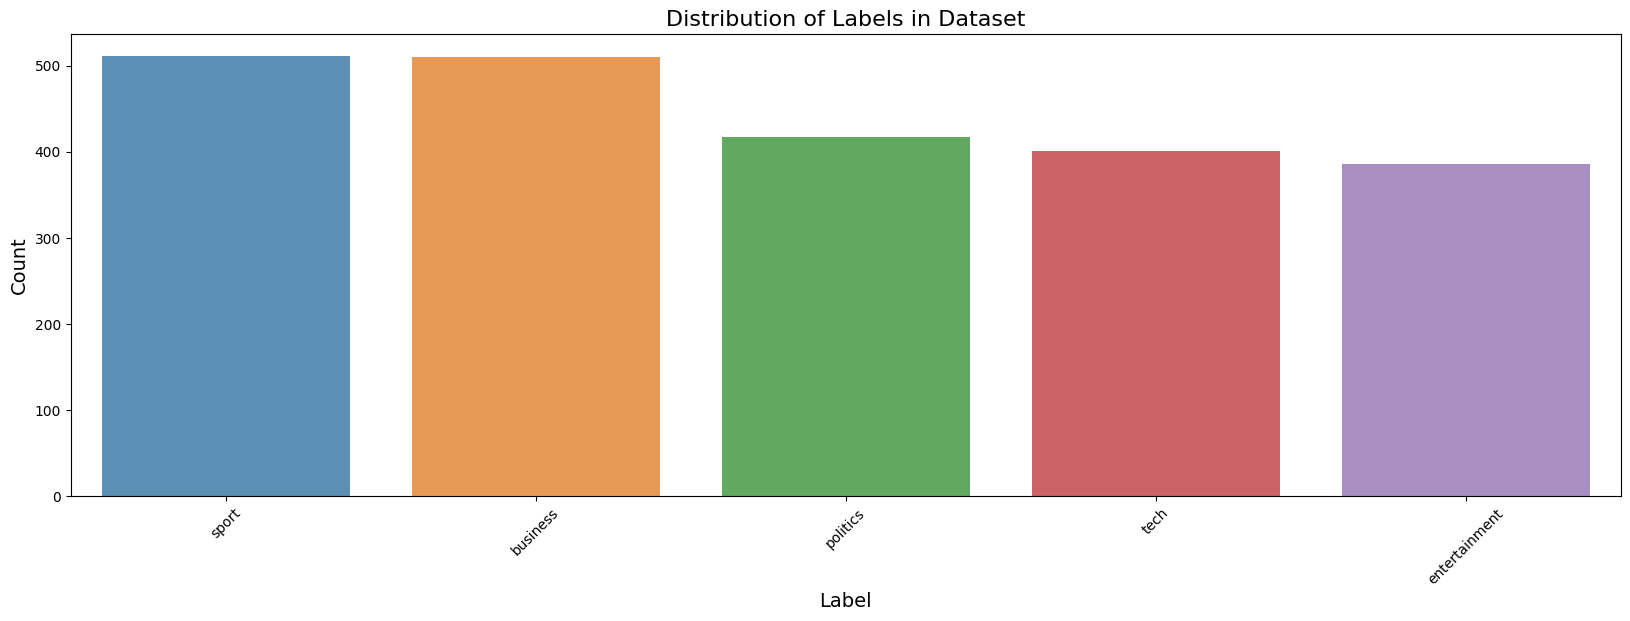

In [ ]:
#distribution of class
import seaborn as sns
label_count = data_df['labels'].value_counts()

plt.figure(figsize = (20,6))
sns.barplot(x=label_count.index,y=label_count.values,alpha=0.8)
plt.title('Distribution of Labels in Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()
plt.show()






In [ ]:
# We are using test_train_split insead of this

# import random
# files = data_df.copy()
# files = files.sample(frac=1,random_state =43)
# train_length = int(0.8*len(files))
# test_length = int(0.2*len(files))
# train_data = files[:train_length].reset_index().drop('index',axis=1)
# test_data= files[train_length:].reset_index().drop('index',axis=1)

In [ ]:
data_df.shape

(2225, 2)

In [ ]:
def read_text_file(file_path,encoding='utf-8'):
  with open(file_path,'r', encoding=encoding) as file:
    text = file.read()
    return text


In [ ]:
fl_path1 = data_df['filepath'][0]
print(read_text_file(fl_path1))

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL

In [ ]:
data_df['text'] = data_df['filepath'].apply(lambda x : read_text_file(x,'latin-1'))
data_df.head()

,filepath,labels,text
0,/content/bbc/business/001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,/content/bbc/business/002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,/content/bbc/business/003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,/content/bbc/business/004.txt,business,High fuel prices hit BA's profits\n\nBritish A...
4,/content/bbc/business/005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...


In [ ]:
X = data_df['text']
Y = data_df['labels']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#feature extraction
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


In [ ]:
#model building
model = MultinomialNB()
model.fit(X_train_features,Y_train)

MultinomialNB()

In [ ]:
Y_pred = model.predict(X_test_features)

In [ ]:
Y_test[1644]

'sport'

In [ ]:
X_train[66]

'FAO warns on impact of subsidies\n\nBillions of farmers\' livelihoods are at risk from falling commodity prices and protectionism, the UN\'s Food & Agriculture Organisation has warned.\n\nTrade barriers and subsidies "severely" distort the market, the FAO report on the "State of Agricultural Commodity Markets 2004" said. As a result, the 2.5 billion people in the developing world who rely on farming face food insecurity. The most endangered are those who live in the least-developed countries. The FAO report said that support for farmers in industrialised nations was equivalent to 30 times the amount provided as aid for agricultural development in poor countries.\n\nThe FAO has urged the World Trade Organisation to swiftly conclude negotiations to liberalise trade, easing developing countries\' access to the world market. It also criticised the high tariffs imposed by both developed and developing nations. It recommends that developing countries reduce their own tariffs to encourage tr

#examples tested :
### "blockchain machine learning i am using that prime-minister" ===> politics

###"comady show i happy sad emotional" ===> entertainment

###"business sport entertainment" ===> tech

In [ ]:
#predictive model
New_data = ["business sport entertainment"]

New_data_feature = vectorizer.transform(New_data)
Predicted = model.predict(New_data_feature)
Predicted[0]



'tech'

#Evaluation

In [ ]:
accuracy = model.score(X_train_features,Y_train)
print(accuracy)

0.9943820224719101


In [ ]:
accuracy = model.score(X_test_features,Y_test)
print(accuracy)

0.9730337078651685


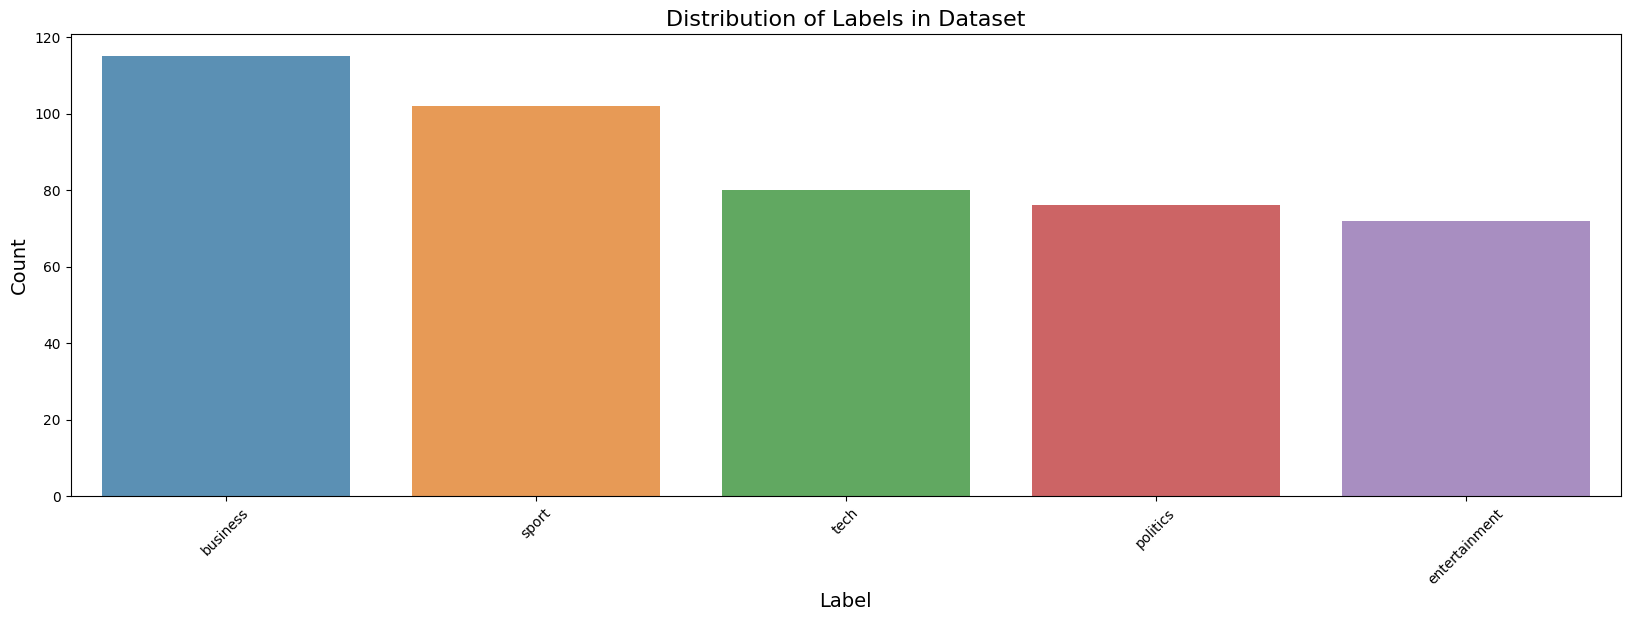

In [ ]:
label_count = Y_test.value_counts()
plt.figure(figsize = (20,6))
sns.barplot(x=label_count.index,y=label_count.values,alpha=0.8)
plt.title('Distribution of Labels in Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()
plt.show()

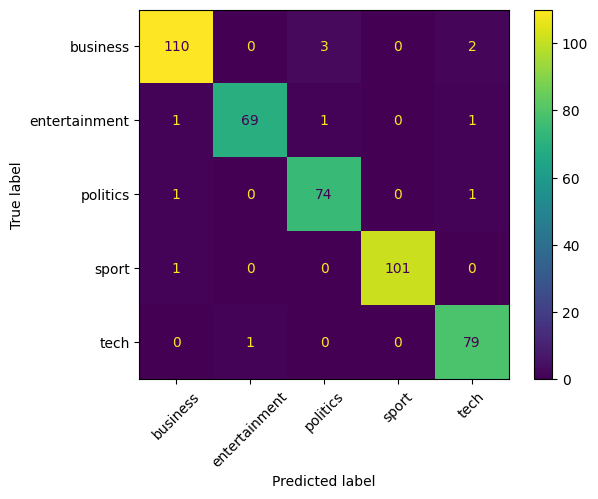

In [ ]:
confusion = metrics.confusion_matrix(Y_test,Y_pred)
conf_display = metrics.ConfusionMatrixDisplay(confusion,display_labels=['business','entertainment','politics','sport','tech'])
conf_display.plot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
report = classification_report(Y_test, Y_pred)
print(report)

               precision    recall  f1-score   support

     business       0.97      0.96      0.96       115
entertainment       0.99      0.96      0.97        72
     politics       0.95      0.97      0.96        76
        sport       1.00      0.99      1.00       102
         tech       0.95      0.99      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

